In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#For Buiilding the Model
#from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

###Evaluation###
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### Loading and Pre-processing data

In [2]:
### Load the data
df = pd.read_csv("song_data.csv", index_col = 0)
print("Size of the data:", df.shape)
df.tail(n=100)

Size of the data: (18835, 14)


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Shrike,72,300706,0.464,0.387,0.278,0.005270,7,0.102,-8.454,0,0.0318,153.426,3,0.0632
Chemicals,72,199906,0.885,0.608,0.238,0.125000,0,0.111,-13.604,1,0.0434,78.013,4,0.2700
People Change,69,212853,0.884,0.374,0.276,0.012300,7,0.122,-14.945,1,0.0353,80.169,4,0.4120
Thousand (feat. Lisa Hannigan),69,206440,0.943,0.676,0.198,0.013200,1,0.104,-13.910,1,0.0333,118.004,4,0.1250
Old Friend,69,148200,0.811,0.412,0.241,0.392000,3,0.114,-13.477,1,0.0295,100.979,4,0.3740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.3000
Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.2650
Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.2860


<AxesSubplot:>

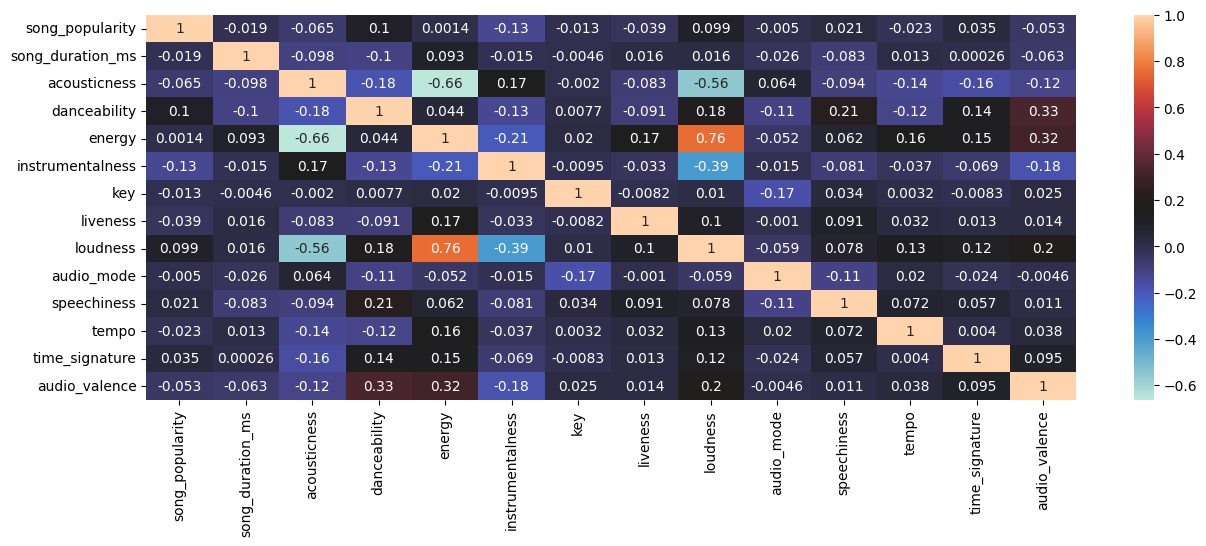

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(), cmap='icefire', annot=True, ax=ax)

In [44]:
df.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


I decided to do two things in here. I am not sure whether to include the song popularity as one of the features given that we highlighted it on the proposal or just exclude it when training the dataset and use it later. So, I decided to create two datasets for that and compare. But it is really mostly based on hopw we understand and interpret our problem.

## Dropping song popularity with other "irrelevant features"
### Using this dataset in getting the k-means

In [4]:
#Filter out features
song_feature = df.drop(['song_duration_ms','time_signature', 'key','audio_mode'], axis = 1)
y_test = df.song_popularity.values
song_feature.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,73,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
In The End,66,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
Seven Nation Army,76,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
By The Way,74,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
How You Remind Me,56,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574


array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

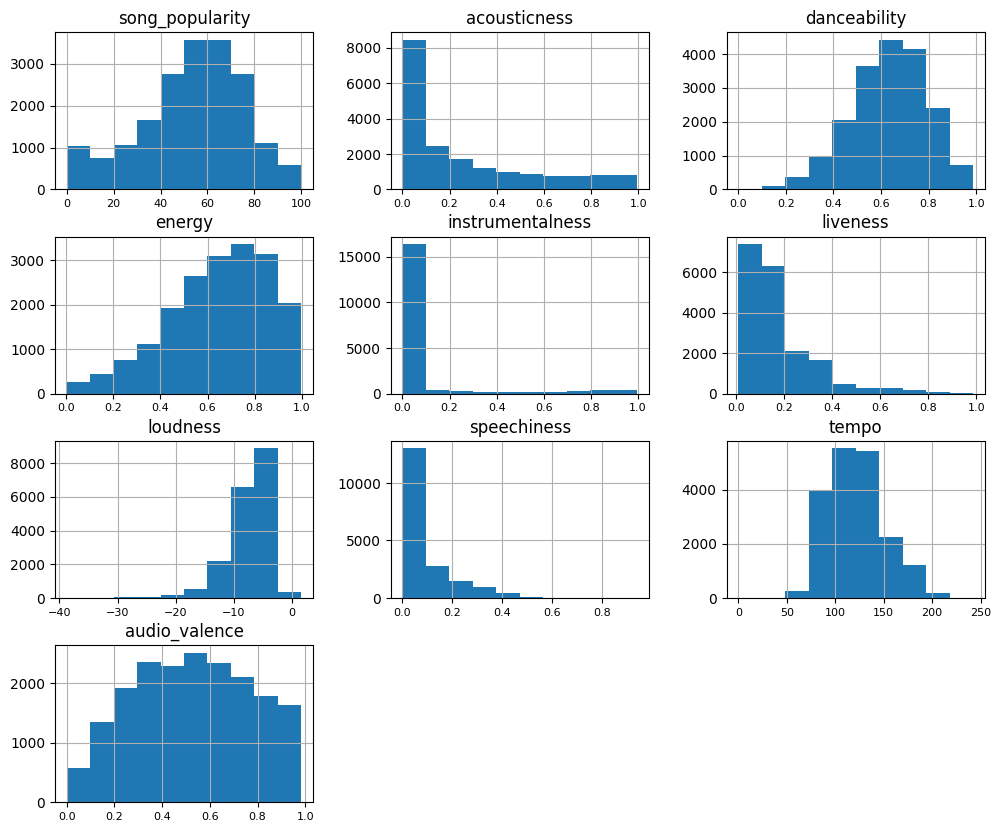

In [5]:
song_feature.hist(xlabelsize=8, figsize=(12,10))

### Descriptive Analysis

In [6]:
#Mean, Median, and Mode

In [7]:
#Standard Deviation

In [8]:
#Frequency

In [9]:
#P value

### Standardized data

In [10]:
y_min = np.min(song_feature, axis=0)
y_max = np.max(song_feature, axis=0) 
y_std = (song_feature - y_min)/(y_max- y_min).values
shape = np.shape(y_std)
y_std

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,0.73,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,0.031243,0.689425,0.481707
In The End,0.66,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.052922,0.434371,0.376016
Seven Nation Army,0.76,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,0.084166,0.511233,0.329268
By The Way,0.74,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,0.113709,0.505303,0.201220
How You Remind Me,0.56,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,0.033262,0.709856,0.583333
...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,0.60,0.896586,0.506586,0.150241,0.000066,0.102656,0.561569,0.036982,0.470328,0.304878
Answers,0.60,0.768072,0.501520,0.160262,0.000001,0.096503,0.611850,0.031987,0.389100,0.269309
Sudden Love (Acoustic),0.23,0.850401,0.728470,0.324602,0.000000,0.117014,0.657845,0.037726,0.538689,0.290650


### Using Elbow Method

In [11]:
def optimise_k(o_data, max_k):
    o_means = []
    o_inertias = []

    for o in range (1, max_k):
        ok_means = KMeans(n_clusters=o)
        ok_means.fit(o_data)

        o_means.append(o)
        o_inertias.append(ok_means.inertia_)

    fig = plt.subplots(figsize = (10,5))
    plt.plot(o_means, o_inertias, 'o-')
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

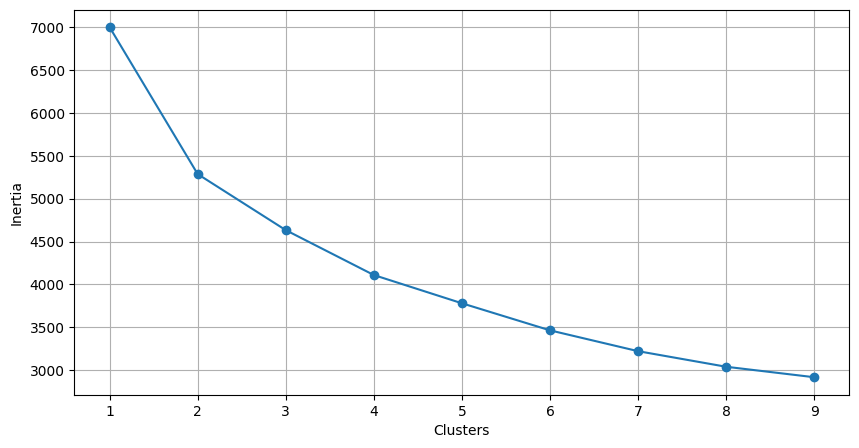

In [12]:
optimise_k(y_std, 10)

In [13]:
# Training and Predicting
kmeans_all = KMeans(n_clusters=2, random_state=0).fit(y_std)
preds = kmeans_all.predict(y_std)

y_std_copy = y_std.copy()
# Adding predictions to dataframe
y_std_copy['cluster'] = preds

# Grouping clusters to see the averages
cluster = y_std_copy \
    .groupby('cluster') \
    .agg('mean')
cluster.style.highlight_max(color='lightgreen')
#cluster.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
cluster,,,,,,,,,,
0,0.495129,0.699071,0.576028,0.390955,0.159651,0.151726,0.682880,0.084288,0.472742,0.436396
1,0.540808,0.122014,0.662242,0.724858,0.052762,0.179737,0.805363,0.116079,0.508066,0.567901


song_popularity - Cluster 0
acousticness - Cluster 1
danceability - Cluster 0
energy - Cluster 3
instrumentalness - Cluster 2
liveness - Cluster 2
loudness - Cluster 0
speechiness - Cluster - 1
tempo - Cluster 3
audio_valence - Cluster 2

#### Danceability, loudness and energy

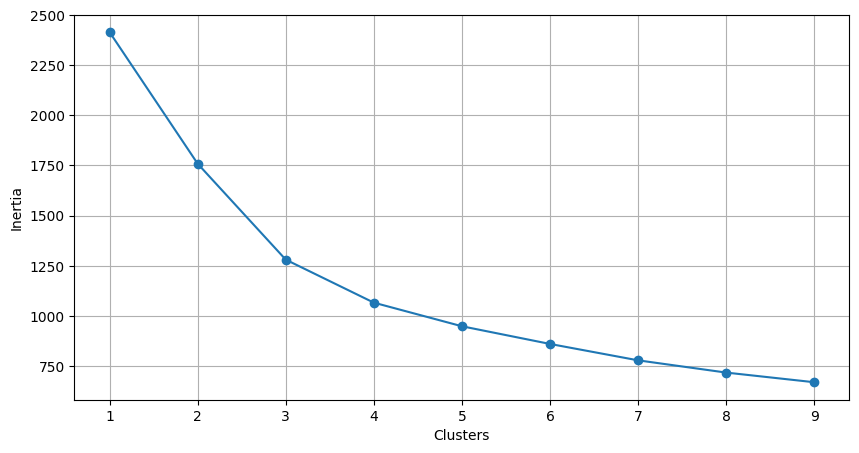

In [14]:
# Select the features to use for clustering
X = y_std[['song_popularity','danceability', 'loudness', 'energy']]
optimise_k(X, 10)

In [15]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=3, random_state=0).fit(X)
preds = kmeans_model.predict(X)

#y_std_copy = .copy()
# Adding predictions to dataframe
X['cluster'] = preds

# Grouping clusters to see the averages
cluster = X \
    .groupby('cluster') \
    .agg('mean')
cluster.style.highlight_max(color='lightgreen')

C:\Users\DELL\AppData\Local\Temp\ipykernel_28220\1415904619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = preds


,song_popularity,danceability,loudness,energy
cluster,,,,
0,0.672872,0.675363,0.814397,0.732754
1,0.269208,0.629959,0.799925,0.739752
2,0.519792,0.582316,0.666213,0.347624


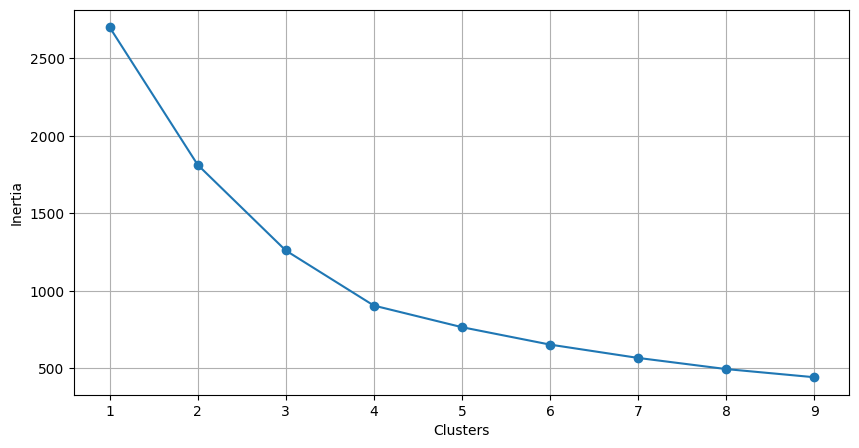

In [16]:
# Select the features to use for clustering
Z = y_std[['song_popularity','instrumentalness', 'energy']]
optimise_k(Z, 10)

#### Instrumentalness vs Energy

In [17]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=4, random_state=0).fit(Z)
preds = kmeans_model.predict(Z)

#y_std_copy = .copy()
# Adding predictions to dataframe
Z['cluster'] = preds

# Grouping clusters to see the averages
cluster = Z \
    .groupby('cluster') \
    .agg('mean')
cluster.style.highlight_max(color='lightgreen')

C:\Users\DELL\AppData\Local\Temp\ipykernel_28220\2599778946.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['cluster'] = preds


,song_popularity,instrumentalness,energy
cluster,,,
0,0.671895,0.012649,0.768619
1,0.569442,0.017305,0.416565
2,0.440773,0.794342,0.501352
3,0.249081,0.021942,0.722322


>> The after this I think we can look what songs are included sa cluster with high song popularity and what features yung included sa cluster na to. Pero di talaga ako sure if tama tong ginawa ko based sa pinapagawa ni maam sa atin sa response niya sa email but hopefully it can help even a little.

### Training dataset

In [18]:
y = y_std_copy.cluster.values
x = y_std_copy.drop(['cluster'],axis=1)
x

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,0.73,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,0.031243,0.689425,0.481707
In The End,0.66,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.052922,0.434371,0.376016
Seven Nation Army,0.76,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,0.084166,0.511233,0.329268
By The Way,0.74,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,0.113709,0.505303,0.201220
How You Remind Me,0.56,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,0.033262,0.709856,0.583333
...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,0.60,0.896586,0.506586,0.150241,0.000066,0.102656,0.561569,0.036982,0.470328,0.304878
Answers,0.60,0.768072,0.501520,0.160262,0.000001,0.096503,0.611850,0.031987,0.389100,0.269309
Sudden Love (Acoustic),0.23,0.850401,0.728470,0.324602,0.000000,0.117014,0.657845,0.037726,0.538689,0.290650


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state = 42)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (13184, 10)
y_train size: (13184,)

x_test size: (5651, 10)
y_test size: (5651,)


In [20]:
from sklearn.svm import SVC

# Create an instance of the SVC class
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(x_train, y_train)

# Make predictions on the test data
pred_svm = svm.predict(x_test)

#Evaluating model
acc_svc = accuracy_score(pred_svm,y_test)
pres_svc = precision_score(pred_svm,y_test)
rec_svc = recall_score(pred_svm,y_test)
auc_svc = roc_auc_score(y_test, pred_svm)

print("precision:", precision_score(pred_svm,y_test))
print("recall:", recall_score(pred_svm,y_test))
print("accuracy:", acc_svc)
print("AUC:",auc_svc)

precision: 0.9981338931653837
recall: 0.9969711090400746
accuracy: 0.9962838435675102
AUC: 0.9943015506882636


In [21]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(x_train, y_train)

# Make predictions on the test data
pred_log = logistic_regression.predict(x_test)

#Evaluating model
pres_log= precision_score(pred_log,y_test)
rec_log= recall_score(pred_log,y_test)
acc_log=accuracy_score(pred_log,y_test)
auc_log = roc_auc_score(y_test, pred_log)

###Printing out results###
print("precision:", precision_score(pred_log,y_test))
print("recall:", recall_score(pred_log,y_test))
print("accuracy:", acc_log)
print("AUC:",auc_log)

precision: 0.999766736645673
recall: 0.9951242163919202
accuracy: 0.9961068837373916
AUC: 0.9921854211087603


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
random_forest = RandomForestClassifier()

# Train the model on the training data
random_forest.fit(x_train, y_train)

# Make predictions on the test data
pred_forest = random_forest.predict(x_test)

#Evaluating model
acc_randforest= accuracy_score(pred_forest,y_test)
pres_randforest=precision_score(pred_forest,y_test)
rec_randforest = recall_score(pred_forest,y_test)
auc_randforest = roc_auc_score(y_test, pred_forest)

###Printing out results###
print("precision:", precision_score(pred_forest,y_test))
print("recall:", recall_score(pred_forest,y_test))
print("accuracy:", acc_randforest)
print("AUC:",auc_randforest)

precision: 0.9974341031024027
recall: 0.9891279204256304
accuracy: 0.9897363298531233
AUC: 0.9814883125482688


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
pred_knn = knn.predict(x_test)

#Evaluating model
acc_knn=accuracy_score(pred_knn,y_test)
pres_knn= precision_score(pred_knn,y_test)
rec_knn = recall_score(pred_knn,y_test)
auc_knn = roc_auc_score(y_test, pred_knn)

###Printing out results###
print("precision:", precision_score(pred_knn,y_test))
print("recall:", recall_score(pred_knn,y_test))
print("accuracy:", acc_knn)
print("AUC:",auc_knn)

precision: 0.9953347329134593
recall: 0.9838598109292137
accuracy: 0.9840736152893294
AUC: 0.9720075424098089


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
pred_tree = decision_tree.predict(x_test)

#Evaluating model
acc_tree= accuracy_score(pred_tree,y_test)
pres_tree= precision_score(pred_tree,y_test)
rec_tree = recall_score(pred_tree,y_test)
auc_tree = roc_auc_score(y_test, pred_tree)

###Printing out results###
print("precision:", precision_score(pred_tree,y_test))
print("recall:", recall_score(pred_tree,y_test))
print("accuracy:", acc_tree)
print("AUC:",auc_tree)

precision: 0.9916025192442267
recall: 0.9879154078549849
accuracy: 0.9844275349495665
AUC: 0.9767396760444007


In [29]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

pred_xgb = xgb.predict(x_test)

acc_xgb  = accuracy_score(pred_xgb,y_test)
pres_xgb = precision_score(pred_xgb,y_test)
rec_xgb  = recall_score(pred_xgb,y_test)
auc_xgb = roc_auc_score(y_test, pred_xgb)

print("precision:", pres_xgb)
print("recall:", rec_xgb)
print("accuracy:", acc_xgb)
print("AUC:",auc_xgb)

precision: 0.9981338931653837
recall: 0.99442249593307
accuracy: 0.994337285436206
AUC: 0.9902692926237475


In [31]:
lgbm = LGBMClassifier()


lgbm.fit(x_train, y_train)

pred_lgbm = lgbm.predict(x_test)

acc_lgbm  = accuracy_score(pred_lgbm,y_test)
pres_lgbm = precision_score(pred_lgbm,y_test)
rec_lgbm  = recall_score(pred_lgbm,y_test)
auc_lgbm  = roc_auc_score(y_test, pred_lgbm)

print("precision:", pres_lgbm)
print("recall:", rec_lgbm)
print("accuracy:", acc_lgbm)
print("AUC:",auc_lgbm)

precision: 0.9976673664567296
recall: 0.9944199023482911
accuracy: 0.9939833657759689
AUC: 0.9900360292694206


In [33]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'Light Gradient Boosting Machine'],
    'Accuracy': [acc_svc, acc_knn, acc_log, acc_randforest, acc_tree, acc_xgb, acc_lgbm],
    'Precision': [pres_svc, pres_knn, pres_log, pres_randforest, pres_tree, pres_xgb, pres_lgbm],
    'Recall': [rec_svc, rec_knn, rec_log, rec_randforest, rec_tree, rec_xgb, rec_lgbm],
    'AUC': [auc_svc, auc_knn, auc_log, auc_randforest, auc_tree, auc_xgb, auc_lgbm]})

results.style.highlight_max(color='lightblue')

,Model,Accuracy,Precision,Recall,AUC
0,Support Vector Machines,0.996284,0.998134,0.996971,0.994302
1,KNN,0.984074,0.995335,0.983860,0.972008
2,Logistic Regression,0.996107,0.999767,0.995124,0.992185
3,Random Forest,0.989736,0.997434,0.989128,0.981488
4,Decision Tree,0.984428,0.991603,0.987915,0.976740
5,XGBoost,0.994337,0.998134,0.994422,0.990269
6,Light Gradient Boosting Machine,0.993983,0.997667,0.994420,0.990036


<h3>Data Testing</h3>

In [36]:
input_data = pd.read_csv("song_input.csv")
input_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.06,4,0.474


In [40]:
new_song_feature = input_data.drop(['song_duration_ms','time_signature', 'key','audio_mode'], axis = 1)
new_song_feature

,song_name,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,Boulevard of Broken Dreams,73,0.00552,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.06,0.474


In [54]:
y_train

array([1, 0, 1, ..., 0, 1, 1])

In [57]:
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()


In [59]:
x_train

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Pure Love - Remastered,0.28,0.311244,0.527862,0.718417,0.000000,0.055276,0.735162,0.034431,0.624039,0.862805
What Is There to Say?,0.43,0.522088,0.777102,0.131202,0.903711,0.107784,0.513097,0.140276,0.499125,0.185976
Quiero Ser de Ti,0.41,0.094377,0.823708,0.629233,0.003972,0.032817,0.777588,0.095112,0.626875,0.832317
You Can't Hurry Love,0.34,0.067670,0.647416,0.923842,0.000000,0.078966,0.819270,0.034006,0.403907,0.773374
A Million,0.48,0.503012,0.924012,0.294540,0.000601,0.043688,0.717320,0.064506,0.460354,0.816057
...,...,...,...,...,...,...,...,...,...,...
Oye Como Va,0.27,0.653614,0.721378,0.338631,0.000848,0.073839,0.583129,0.054198,0.510705,0.900407
Love That About You,0.74,0.046485,0.559271,0.573116,0.000000,0.096503,0.797537,0.100744,0.751657,0.533537
Today All Over Again,0.26,0.643574,0.581560,0.169280,0.000000,0.111886,0.521671,0.028374,0.359775,0.498984


In [58]:
tsvm = SVC(kernel='linear', probability=True)

tsvm.fit(new_song_feature, y_train)



ValueError: could not convert string to float: 'Boulevard of Broken Dreams'